<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/24_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyogrio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 30.6 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pooch
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
aoi_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/City_Boundary.zip',
    known_hash='431710489ce01850be3ed0ac816305b41cbd871b14fae7d3c94bb8da469c6aa6'
)

anb_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_anb_shp.zip',
    known_hash='67de38f5edb30f2578aef2a64f10a0a7cc7a8a1b77d680e34936574e35528f26'
)

In [4]:
anb_file = f'{anb_file}!geonb_anb_addresses.shp'
anb_file

'/root/.cache/pooch/2520ffadcdc6224a88a33a77bbf2de03-geonb_anb_shp.zip!geonb_anb_addresses.shp'

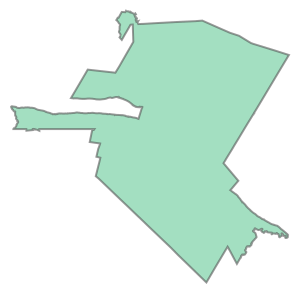

In [5]:
aoi = (
    gpd.read_file(aoi_file)
       .to_crs('EPSG:2953')
       .geometry
       .values[0]
)

aoi

(29845, 29)


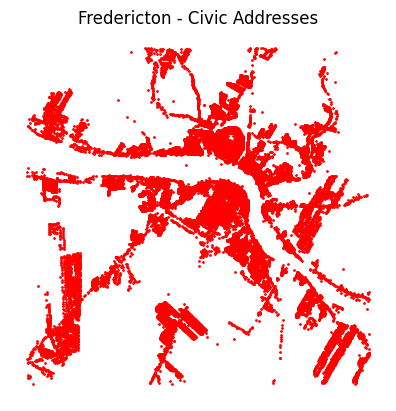

In [6]:
anb = gpd.read_file(
    anb_file,
    engine='pyogrio',
    use_arrow=True,
    bbox=aoi
).to_crs('epsg:4326')

print(anb.shape)

anb.geometry.plot(markersize=1, color='red')
plt.axis('off')
plt.title('Fredericton - Civic Addresses')
plt.savefig('CivicAddress.png', dpi=600, bbox_inches='tight');

# Heatmap

In [7]:
x, y = anb.geometry.x.values, anb.geometry.y.values
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(150, 150))

In [8]:
# Customize the colormap (Set 0 as transparent)
cmap = plt.cm.Spectral
cmap_colors = cmap(np.arange(cmap.N))
cmap_colors[0, -1] = 0
custom_cmap = ListedColormap(cmap_colors)

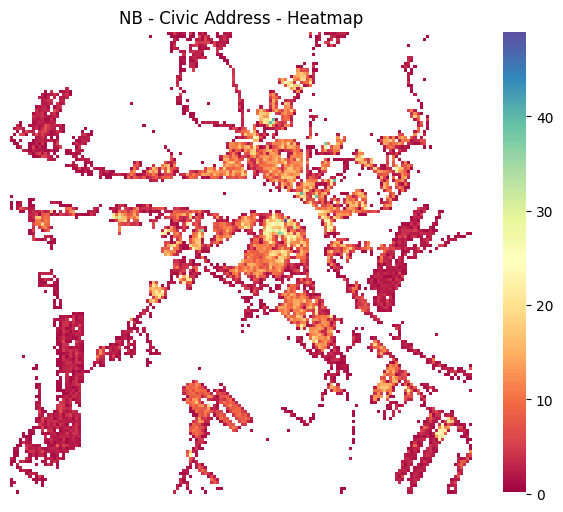

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap.T, cmap=custom_cmap, cbar=True, square=True)
plt.title('NB - Civic Address - Heatmap')
plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig('Heatmap.png', dpi=600, bbox_inches='tight');

# Full Code

In [ ]:
"""
Vaasudevan Srinivasan 🧑🏻‍💻
StratagemGIS Solutions
Script to generate Heatmap of points
"""


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap


# Fredericton AOI
aoi = (gpd.read_file(aoi_file).to_crs('EPSG:2953').geometry.values[0])

# Civic Address
anb = gpd.read_file(anb_file, engine='pyogrio', use_arrow=True, bbox=aoi)
anb = anb.to_crs('epsg:4326')

# Heatmap
x, y = anb.geometry.x.values, anb.geometry.y.values
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(150, 150))

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap.T, cmap=custom_cmap, cbar=True, square=True)
plt.title('NB - Civic Address - Heatmap')
plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig('Heatmap.png', dpi=600, bbox_inches='tight');